In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, ReLU, Reshape, Flatten
from tensorflow.keras.models import Sequential
sns.set()

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
trainX = np.array(trainX)/255.
testX = np.array(testX)/255.

In [3]:
netA = Sequential(name = 'netA')
netA.add(Reshape((-1,), input_shape = (32,32,3)))
netA.add(Dense(10, activation=None))
netA.compile('adam', 'sparse_categorical_crossentropy', ['acc'])
histA = netA.fit(trainX, trainY, epochs = 50, validation_data = (testX, testY))
histA = histA.history


netB = Sequential(name = 'netB')
netB.add(Reshape((-1,), input_shape = (32, 32, 3)))
netB.add(Dense(300))
netB.add(ReLU())
netB.add(Dense(10, activation= 'softmax'))
netB.compile('adam', 'sparse_categorical_crossentropy', ['acc'])
histB = netB.fit(trainX, trainY, epochs = 50, validation_data = (testX, testY))
histB = histB.history


netC = Sequential(name = 'netC')
netC.add(Conv2D(25, (5,5), input_shape = (32, 32, 3)))
netC.add(ReLU())
netC.add(MaxPooling2D((2,2)))
netC.add(Flatten())
netC.add(Dense(10, activation = 'softmax'))
netC.compile('adam', 'sparse_categorical_crossentropy', ['acc'])
histC = netC.fit(trainX, trainY, epochs = 50, validation_data = (testX, testY))
histC = histC.history

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 5.7945 - acc: 0.1060 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3026 - acc: 0.1126 - val_loss: 2.3026 - val_acc: 0.1131
Epoch 8/50
1563/1563 [==============================] - 4s 3ms

====== Graphs for netA  =========


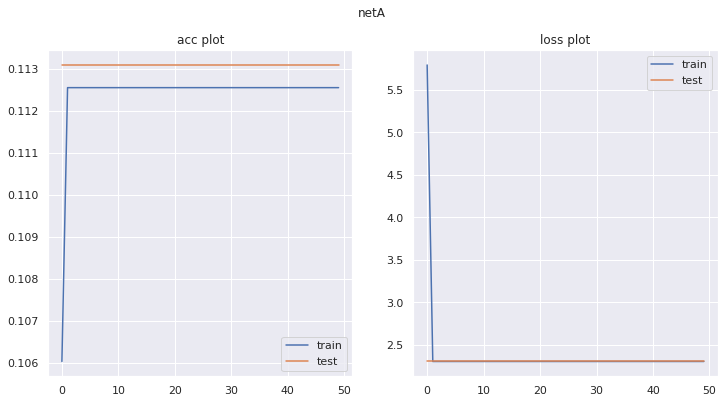





====== Graphs for netB  =========


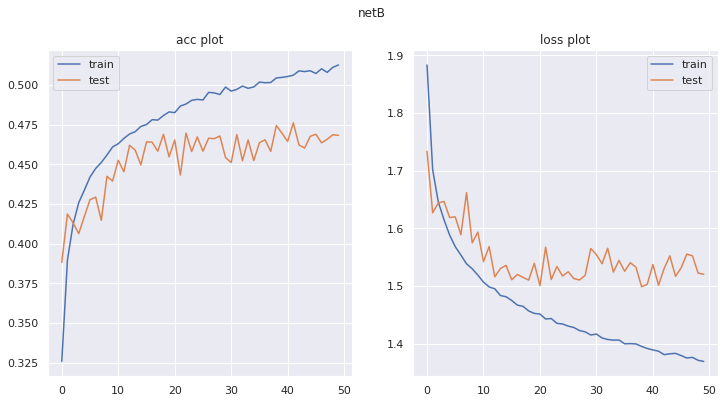





====== Graphs for netC  =========


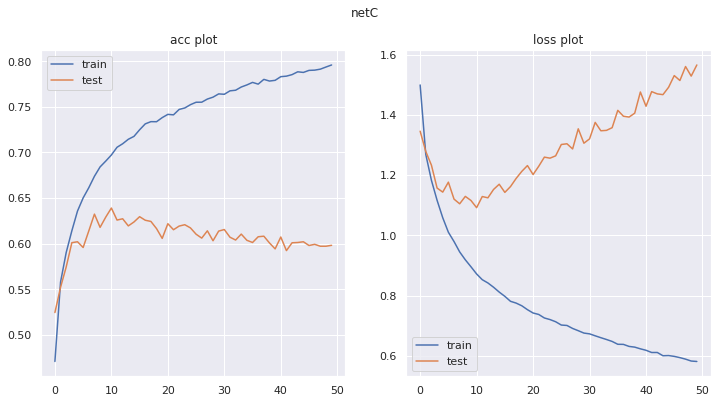

In [10]:
hists = [histA, histB, histC]
names = ['netA', 'netB', 'netC']

for hist, name in zip(hists, names):
    print(f'====== Graphs for {name}  =========')
    fig, axis = plt.subplots(1, 2, figsize = (12,6))
    fig.suptitle(name)
    axis[0].plot(hist['acc'], label = 'train')
    axis[0].plot(hist['val_acc'], label = 'test')
    axis[0].legend()
    axis[0].set_title('acc plot')
    axis[1].plot(hist['loss'], label = 'train')
    axis[1].plot(hist['val_loss'], label = 'test')
    axis[1].legend()
    axis[1].set_title('loss plot')
    plt.show()
    print('\n\n\n')